In [2]:
# #dataset ref: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package?resource=download
from google.colab import files
#uploaded = files.upload()

# **Import data and libraries**

In [3]:
import numpy as np
import random
import torch
import matplotlib.pyplot as plt
import pandas as pd
import time
import os
%matplotlib inline

random.seed(1111)
np.random.seed(1111)
torch.manual_seed(1111)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(1111)

df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# **Check for overall missing values**

In [4]:
for column in df:
  print(column,100*(df[column].isnull().sum()/len(df.index)))

Date 0.0
Location 0.0
MinTemp 1.0208992162793895
MaxTemp 0.8669049910628353
Rainfall 2.2418534304963567
Evaporation 43.166506256015396
Sunshine 48.00976213391998
WindGustDir 7.098858792795271
WindGustSpeed 7.055547916953114
WindDir9am 7.263852605527293
WindDir3pm 2.906641000962464
WindSpeed9am 1.214766946239516
WindSpeed3pm 2.105046060772721
Humidity9am 1.8245565791282825
Humidity3pm 3.09844630826344
Pressure9am 10.356799120033
Pressure3pm 10.331362573903478
Cloud9am 38.42155919153032
Cloud3pm 40.80709473394747
Temp9am 1.214766946239516
Temp3pm 2.4810944589577892
RainToday 2.2418534304963567
RainTomorrow 2.245978275814657


In [5]:
#get all unique location in the dataset
location = df['Location'].unique()
location

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [6]:
#checking for % of missing values for each location
missing_per_loc = {}
missing_per_loc['location'] = []

for column in df:
  missing_per_loc[column] = []

for loc in location:
  temp_df = df.loc[df['Location'] == loc]
  missing_per_loc['location'].append(loc)
  for column in temp_df:
    missing_per_loc[column].append(100*(temp_df[column].isnull().sum()/len(temp_df.index)))
missing_per_loc = pd.DataFrame(missing_per_loc)
missing_per_loc.head()

,location,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,0.0,0.0,0.361842,0.361842,0.953947,100.000000,100.000000,1.052632,1.052632,...,0.296053,0.263158,0.164474,0.263158,57.598684,53.059211,0.296053,0.263158,0.953947,0.953947
1,BadgerysCreek,0.0,0.0,1.196411,0.963775,2.691924,100.000000,100.000000,2.525756,2.525756,...,1.794616,1.827850,5.583250,5.749418,100.000000,100.000000,1.362579,1.462280,2.691924,2.691924
2,Cobar,0.0,0.0,0.199402,0.099701,0.697906,11.399136,81.721502,1.395813,1.395813,...,4.154204,4.154204,0.997009,0.864074,12.628780,10.235959,0.265869,0.232635,0.697906,0.697906
3,CoffsHarbour,0.0,0.0,0.498504,0.631439,1.861083,40.677966,50.348953,11.930874,11.930874,...,0.631439,0.731140,10.335660,10.368893,27.018943,25.855766,0.498504,0.465271,1.861083,1.861083
4,Moree,0.0,0.0,0.066467,0.000000,5.151213,23.828514,31.704885,2.592223,2.558990,...,0.132935,0.166168,0.000000,0.033234,17.879694,13.426388,0.000000,0.000000,5.151213,5.151213


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5]),
 [Text(0.5, 1, 'Date'),
  Text(1.5, 1, 'Location'),
  Text(2.5, 1, 'MinTemp'),
  Text(3.5, 1, 'MaxTemp'),
  Text(4.5, 1, 'Rainfall'),
  Text(5.5, 1, 'Evaporation'),
  Text(6.5, 1, 'Sunshine'),
  Text(7.5, 1, 'WindGustDir'),
  Text(8.5, 1, 'WindGustSpeed'),
  Text(9.5, 1, 'WindDir9am'),
  Text(10.5, 1, 'WindDir3pm'),
  Text(11.5, 1, 'WindSpeed9am'),
  Text(12.5, 1, 'WindSpeed3pm'),
  Text(13.5, 1, 'Humidity9am'),
  Text(14.5, 1, 'Humidity3pm'),
  Text(15.5, 1, 'Pressure9am'),
  Text(16.5, 1, 'Pressure3pm'),
  Text(17.5, 1, 'Cloud9am'),
  Text(18.5, 1, 'Cloud3pm'),
  Text(19.5, 1, 'Temp9am'),
  Text(20.5, 1, 'Temp3pm'),
  Text(21.5, 1, 'RainToday'),
  Text(22.5, 1, 'RainTomorrow')])

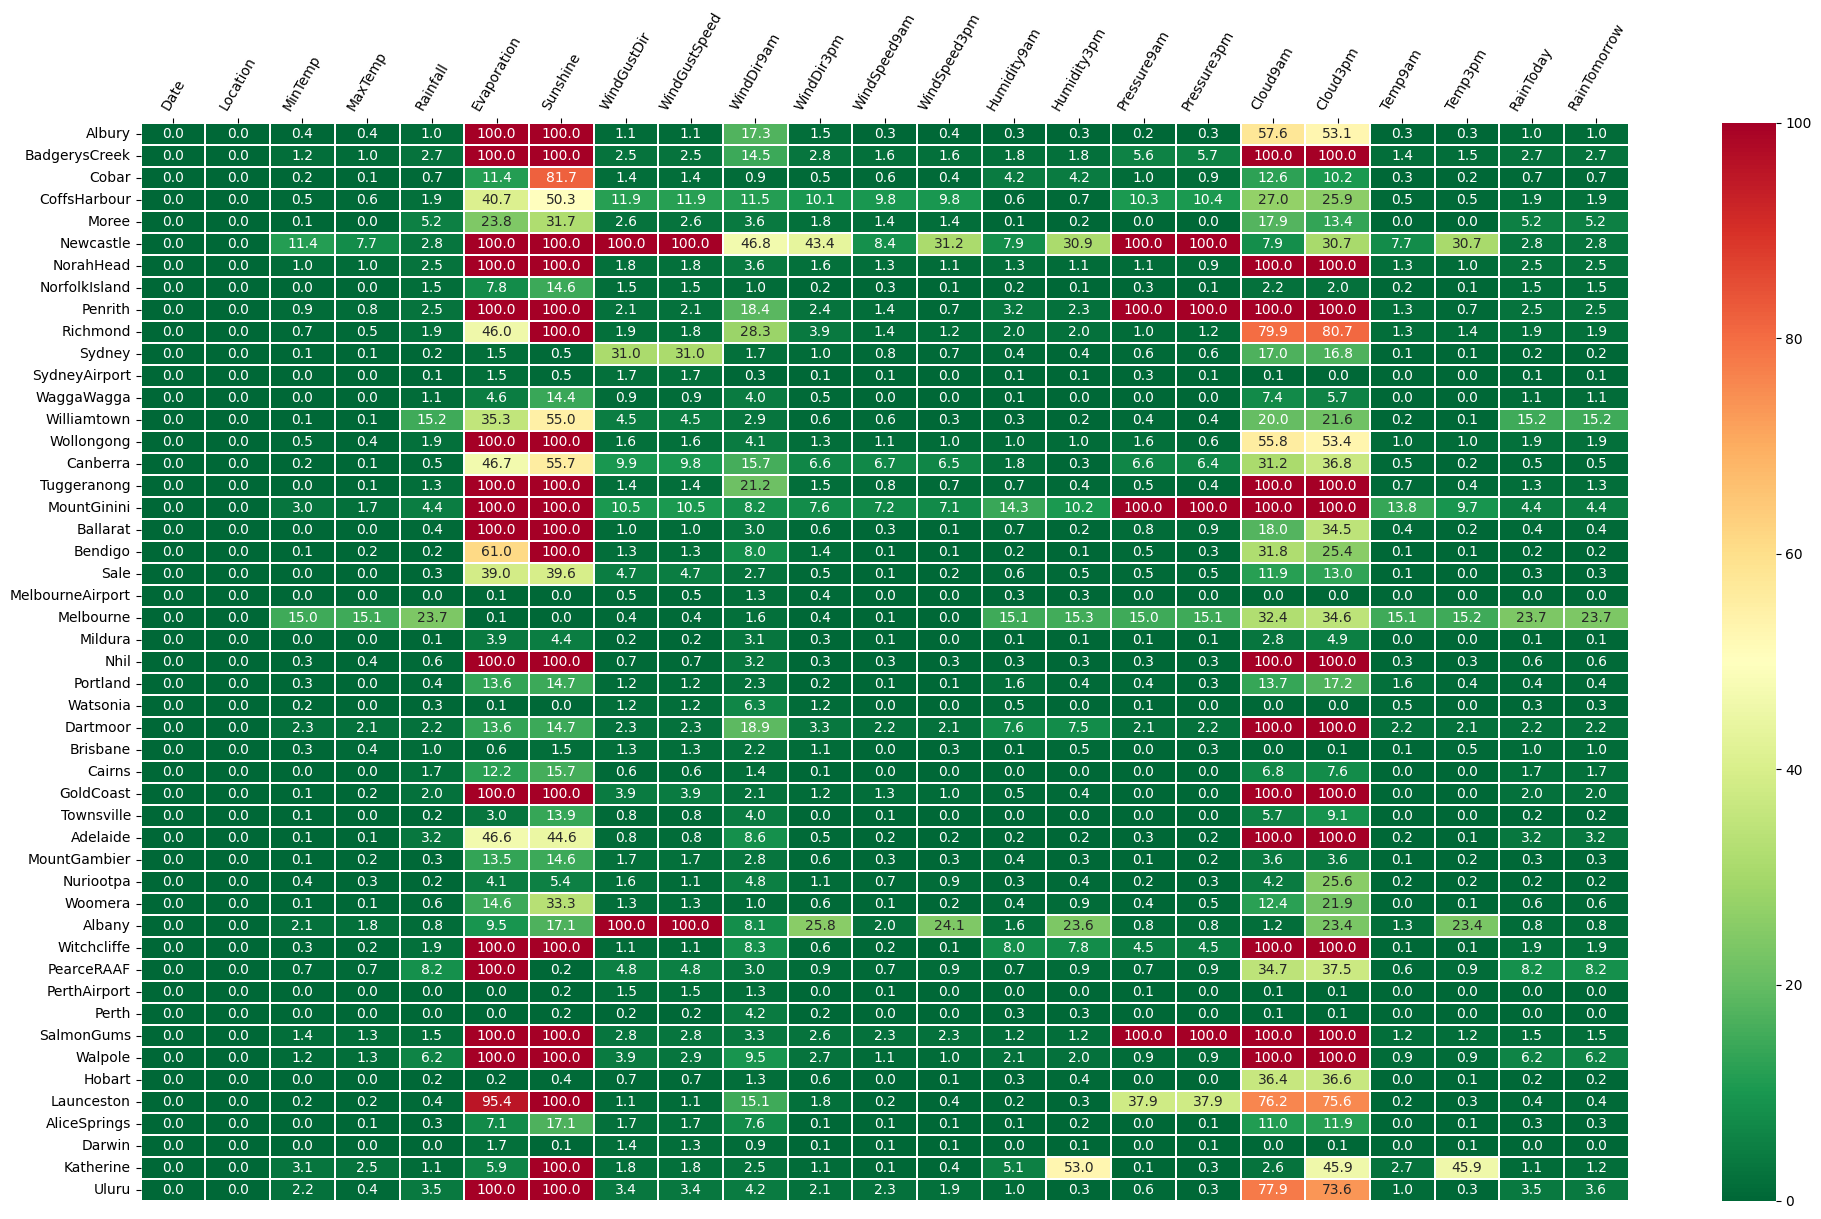

In [7]:
import seaborn as sns

map_df = missing_per_loc.drop('location', axis = 1)
map_df.index = location
fig, ax = plt.subplots(figsize = (24, 14))
sns.heatmap(map_df, cmap ='RdYlGn_r', linewidths = 0.30,fmt=".1f", annot = True)
ax.xaxis.tick_top() # x axis on top
plt.xticks(rotation=60)
#ax.xaxis.set_label_position('top')

In [8]:
# download missing file check for manual viewing
# from google.colab import files

# missing_per_loc.to_csv('missing_per_loc.csv')
# files.download('missing_per_loc.csv')

# **Missing values processing: replace with Mean and Mode**
Selected these stations as study locations due to having the least overall percentage of missing values accross fields

Potential candidate:
SydneyAirport,
WaggaWagga,
Moree,
Cobar,
Sydney,
MelbourneAirport,
Mildura,
Portland,
Watsonia,
Dartmoor,
Brisbane,
Cairns,
Townsville,
Nuriootpa,
PerthAirport,
Perth,
Hobart,
AliceSprings,
Darwin,

Missing value for each location was replaced with Mode and Mean at that specific location to avoid loss in data quality

In [9]:
numerical = ['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine',
               'WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am',
               'Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm',
               'Temp9am','Temp3pm']
categorical = ['WindGustDir','WindDir9am','WindDir3pm']
def fill_missing(x,numerical,categorical):
  for i in numerical:
    mean_x = x[i].mean(skipna=True)
    x[i].fillna(mean_x, inplace=True)

  for i in categorical:
    mode_x = x[i].mode(dropna=True)[0]
    x[i].fillna(mode_x, inplace=True)
  return x

In [10]:
#create 1 dataframe which is the combination of all chosen stations datas
station_list = ['SydneyAirport', 'WaggaWagga', 'Moree', 'Cobar', 'Sydney',
                'MelbourneAirport', 'Mildura', 'Portland', 'Watsonia', 'Dartmoor',
                'Brisbane', 'Cairns', 'Townsville', 'Nuriootpa', 'PerthAirport',
                'Perth', 'AliceSprings', 'Darwin', 'NorfolkIsland','MountGambier','Hobart']
station_list.sort()

df_aus = df.loc[df['Location'] == 'SydneyAirport']
df_aus = fill_missing(df_aus,numerical,categorical)


for i in range(1,len(station_list)):
  df_temp = df.loc[df['Location'] == station_list[i]]
  df_temp = fill_missing(df_temp,numerical,categorical)
  frames = [df_aus,df_temp]
  df_aus = pd.concat(frames)

#dropped since unneeded for purpose of this project
df_aus = df_aus.drop('RainToday', axis=1)
df_aus = df_aus.drop('RainTomorrow', axis=1)
len(df_aus)

<ipython-input-9-c7ff194adcaf>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i].fillna(mean_x, inplace=True)
<ipython-input-9-c7ff194adcaf>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i].fillna(mode_x, inplace=True)
<ipython-input-9-c7ff194adcaf>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i].fillna(mode_x, inplace=True)
<ipython-input-9-c7ff194adcaf>:13: SettingWithCopyWarning: 
A value is trying to be set on a co

64353

In [11]:
#fill all NaN with mean (for numeric) and mode (for categorical)
df_aus.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
33520,2009-01-01,SydneyAirport,17.7,35.1,0.0,9.8,12.9,S,72.00000,NW,...,15.0,33.0,63.0,13.0,1005.3,1000.2,6.0,6.0,22.9,34.0
33521,2009-01-02,SydneyAirport,18.5,23.0,0.0,11.0,5.9,S,63.00000,SSE,...,15.0,35.0,63.0,58.0,1012.9,1014.1,5.0,6.0,20.6,20.1
33522,2009-01-03,SydneyAirport,16.9,23.2,0.0,9.0,0.5,S,47.23428,ESE,...,15.0,17.0,52.0,50.0,1021.8,1019.4,7.0,8.0,18.9,22.0
33523,2009-01-04,SydneyAirport,18.7,27.1,0.0,5.4,11.3,NE,65.00000,NNE,...,24.0,48.0,60.0,51.0,1018.5,1014.9,2.0,1.0,22.9,25.9
33524,2009-01-05,SydneyAirport,20.2,31.6,0.0,10.0,12.2,NNE,63.00000,WNW,...,11.0,35.0,58.0,52.0,1013.2,1008.0,6.0,3.0,24.9,29.0


In [12]:
#separate month and day into independent column
#ref: https://stackoverflow.com/questions/51072938/how-to-split-dataframe-based-on-years-in-python
def create_time_unit(dt):
    dt['Date'] = pd.to_datetime(dt['Date'], errors='coerce')
    dt['YEAR'] = dt['Date'].dt.year
    dt['MONTH'] = dt['Date'].dt.month
    dt['DAY'] = dt['Date'].dt.day
    return dt



df_aus = create_time_unit(df_aus)
df_aus = fill_missing(df_aus,numerical,categorical)
df_aus

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,YEAR,MONTH,DAY
33520,2009-01-01,SydneyAirport,17.7,35.1,0.0,9.8,12.9,S,72.00000,NW,...,13.0,1005.3,1000.2,6.0,6.0,22.9,34.0,2009,1,1
33521,2009-01-02,SydneyAirport,18.5,23.0,0.0,11.0,5.9,S,63.00000,SSE,...,58.0,1012.9,1014.1,5.0,6.0,20.6,20.1,2009,1,2
33522,2009-01-03,SydneyAirport,16.9,23.2,0.0,9.0,0.5,S,47.23428,ESE,...,50.0,1021.8,1019.4,7.0,8.0,18.9,22.0,2009,1,3
33523,2009-01-04,SydneyAirport,18.7,27.1,0.0,5.4,11.3,NE,65.00000,NNE,...,51.0,1018.5,1014.9,2.0,1.0,22.9,25.9,2009,1,4
33524,2009-01-05,SydneyAirport,20.2,31.6,0.0,10.0,12.2,NNE,63.00000,WNW,...,52.0,1013.2,1008.0,6.0,3.0,24.9,29.0,2009,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80993,2017-06-21,Watsonia,5.2,13.6,0.0,0.6,0.0,N,20.00000,ENE,...,83.0,1028.9,1028.5,7.0,7.0,9.8,12.7,2017,6,21
80994,2017-06-22,Watsonia,4.8,13.3,0.4,0.6,0.0,NNW,24.00000,NE,...,63.0,1028.5,1025.1,7.0,7.0,5.6,12.4,2017,6,22
80995,2017-06-23,Watsonia,5.6,13.1,0.0,1.6,6.0,NNW,52.00000,NE,...,67.0,1019.0,1014.0,1.0,7.0,8.8,11.6,2017,6,23
80996,2017-06-24,Watsonia,6.9,12.1,3.2,1.8,5.6,SSW,24.00000,WNW,...,61.0,1018.7,1017.3,2.0,7.0,7.9,11.0,2017,6,24


In [13]:
for column in df_aus:
  print(column,df_aus[column].isnull().sum())

Date 0
Location 0
MinTemp 0
MaxTemp 0
Rainfall 0
Evaporation 0
Sunshine 0
WindGustDir 0
WindGustSpeed 0
WindDir9am 0
WindDir3pm 0
WindSpeed9am 0
WindSpeed3pm 0
Humidity9am 0
Humidity3pm 0
Pressure9am 0
Pressure3pm 0
Cloud9am 0
Cloud3pm 0
Temp9am 0
Temp3pm 0
YEAR 0
MONTH 0
DAY 0


# **Visualization**

In [14]:
df_vis = df_aus.copy()


df_vis["Date"] = pd.to_datetime(df_aus["Date"])

def create_time_unit(dt):
    dt['Date'] = pd.to_datetime(dt['Date'], errors='coerce')
    dt['YEAR'] = dt['Date'].dt.year
    dt['MONTH'] = dt['Date'].dt.month
    dt['DAY'] = dt['Date'].dt.day
    return dt

df_vis = df_vis.reset_index()
df_vis = create_time_unit(df_vis)
df_vis.head()

,index,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,YEAR,MONTH,DAY
0,33520,2009-01-01,SydneyAirport,17.7,35.1,0.0,9.8,12.9,S,72.00000,...,13.0,1005.3,1000.2,6.0,6.0,22.9,34.0,2009,1,1
1,33521,2009-01-02,SydneyAirport,18.5,23.0,0.0,11.0,5.9,S,63.00000,...,58.0,1012.9,1014.1,5.0,6.0,20.6,20.1,2009,1,2
2,33522,2009-01-03,SydneyAirport,16.9,23.2,0.0,9.0,0.5,S,47.23428,...,50.0,1021.8,1019.4,7.0,8.0,18.9,22.0,2009,1,3
3,33523,2009-01-04,SydneyAirport,18.7,27.1,0.0,5.4,11.3,NE,65.00000,...,51.0,1018.5,1014.9,2.0,1.0,22.9,25.9,2009,1,4
4,33524,2009-01-05,SydneyAirport,20.2,31.6,0.0,10.0,12.2,NNE,63.00000,...,52.0,1013.2,1008.0,6.0,3.0,24.9,29.0,2009,1,5


In [15]:
def rain_to_class(x):
  output_label = []
  output_index = []
  class_labels = ['No Rain, 0mm','Very Light Rain, 0.1 - 0.9mm','Light Rain, 1 - 10mm','Moderate Rain, 11 - 30mm','Heavy Rain, 31 - 70mm','Very Heavy Rain, 71 - 150mm','Extremely Heavy Rain, >150mm']
  for i in range(0,len(x)):
    if x[i] == 0:
      output_label.append(class_labels[0])
      output_index.append(0)
    elif x[i] < 1:
      output_label.append(class_labels[1])
      output_index.append(1)
    elif x[i] < 10:
      output_label.append(class_labels[2])
      output_index.append(2)
    elif x[i] < 30:
      output_label.append(class_labels[3])
      output_index.append(3)
    elif x[i] < 70:
      output_label.append(class_labels[4])
      output_index.append(4)
    elif x[i] < 150:
      output_label.append(class_labels[5])
      output_index.append(5)
    elif x[i] > 150:
      output_label.append(class_labels[6])
      output_index.append(6)
  return(output_label,output_index)

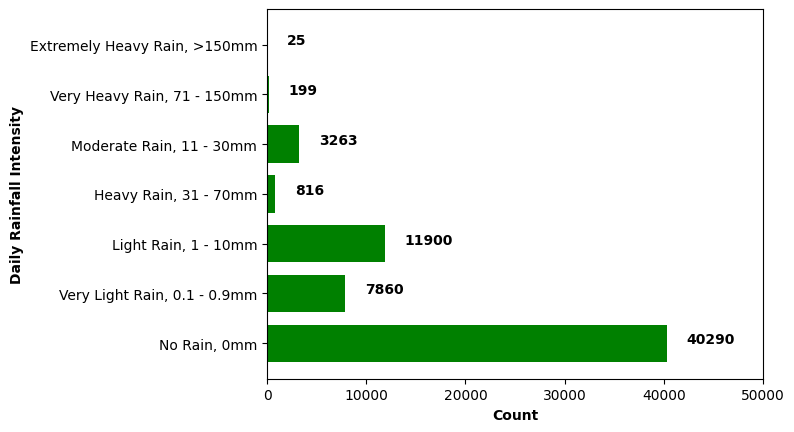

In [16]:
his_data, his_data_label = rain_to_class(df_vis['Rainfall'])

from collections import Counter
his_item = list(Counter(his_data).keys())
his_value = list(Counter(his_data).values())

fig, ax = plt.subplots()
width = 0.75
 
ax.barh(range(len(his_item)), his_value, width, tick_label=his_item, color = "green")
 
for i, v in enumerate(his_value):
    ax.text(v + 2000, i + 0, str(v),
            color = 'black', fontweight = 'bold')
plt.xlabel('Count', fontweight = 'bold')
plt.xlim(0,50000)
plt.ylabel('Daily Rainfall Intensity', fontweight = 'bold') 
plt.show()


# plt.figure(figsize=(10,6))
# bars = plt.barh(range(len(his_item)), his_value, height = 0.6, tick_label=his_item, color = 'g')
# bars[0].set_color('g')

#plt.show()

In [17]:
num_yr = len(np.unique(df_vis['YEAR']))
sum_dict = {}
count_dict = {}
threshold = 1
for i in range(1,13):
  if i in [1,3,5,7,8,10,12]: y = 31
  if i in [4,6,9,11]: y =30
  if i == 2: y = 29

  for z in range(1,y+1):
    sum_dict[i,z] = 0
    count_dict[i,z] = 0

for i in range(0,len(df_vis['Rainfall'])):
  if df_vis['Rainfall'][i] > threshold:
    sum_dict[df_vis['MONTH'][i],df_vis['DAY'][i]] += df_vis['Rainfall'][i]
    count_dict[df_vis['MONTH'][i],df_vis['DAY'][i]] += 1

for k,v in sum_dict.items():
  if count_dict[k] >0:
    sum_dict[k] = v/count_dict[k] #total num of rainfall appreance

freq_dict = {}
for k,v in count_dict.items():
  freq_dict[k] = count_dict[k]/num_yr/len(station_list)

In [18]:
month_df = pd.DataFrame(pd.DataFrame(freq_dict.items())[0].tolist(), columns = ['month','day'], index=pd.DataFrame(freq_dict.items())[0].index)
month_df['freq'] = pd.DataFrame(freq_dict.items())[1]
month_df['average'] = pd.DataFrame(sum_dict.items())[1]
month_df['count'] = pd.DataFrame(count_dict.items())[1]
month_df


,month,day,freq,average,count
0,1,1,0.152381,16.450449,32
1,1,2,0.190476,13.925866,40
2,1,3,0.157143,13.241720,33
3,1,4,0.228571,12.128683,48
4,1,5,0.128571,14.820243,27
...,...,...,...,...,...
361,12,27,0.219048,13.520220,46
362,12,28,0.190476,16.061743,40
363,12,29,0.142857,11.884107,30
364,12,30,0.171429,12.585146,36


<ipython-input-19-ac44810e0d31>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


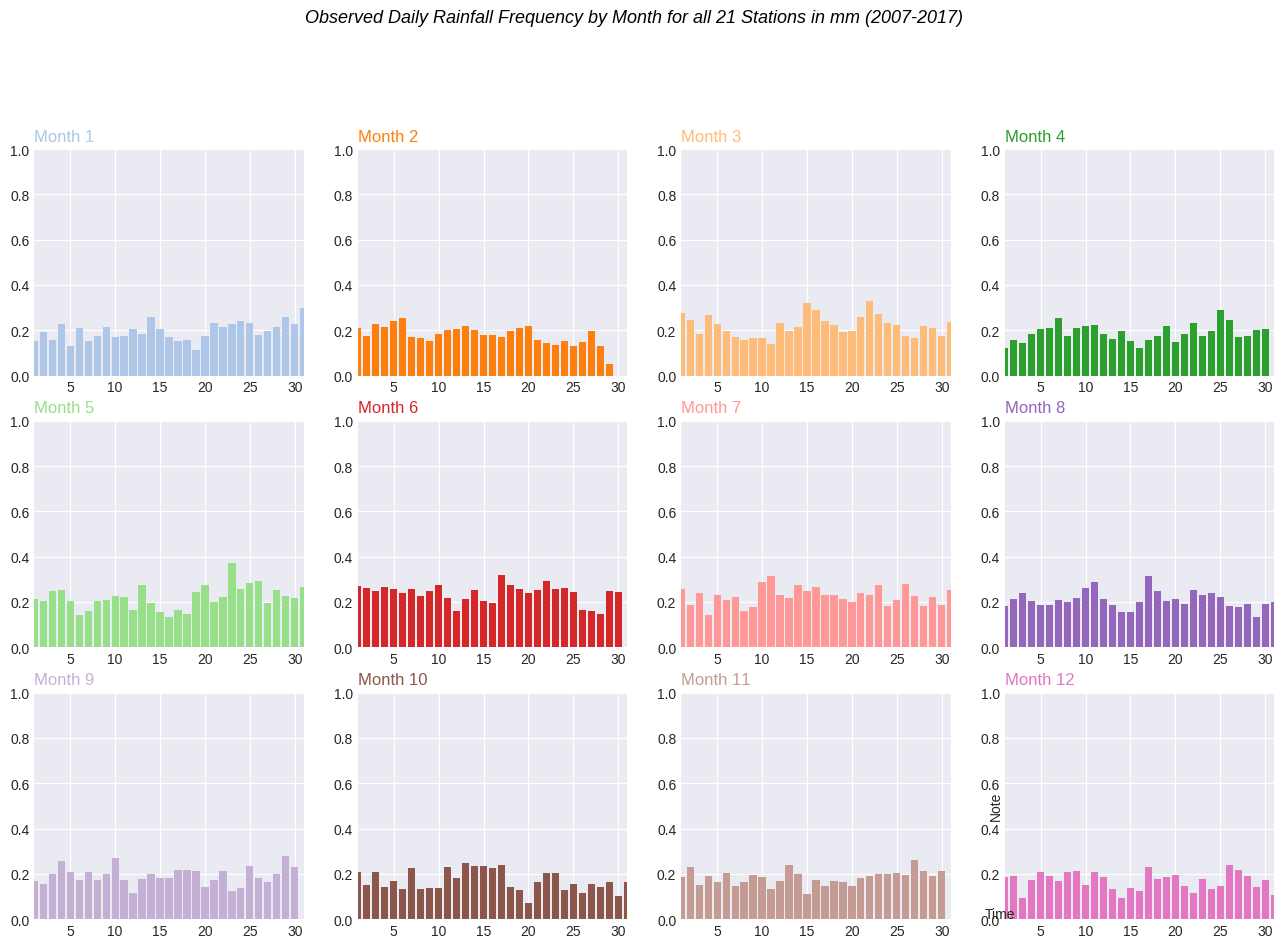

In [19]:
#ref: https://www.python-graph-gallery.com/125-small-multiples-for-line-chart
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



# Initialize the figure style
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('tab20')
 
# multiple line plot

plt.figure(figsize=(16,10))

for i in range(1,13):

    df_temp = month_df[month_df['month'] == i]

    # Find the right spot on the plot
    plt.subplot(3,4, i)
 
    # Plot the lineplot
    plt.bar(x = df_temp['day'], height = df_temp['freq'], color=palette(i))
 
    # Same limits for every chart
    plt.xlim(1,31)
    plt.ylim(0,1)
 
    # Add title
    plt.title('Month '+str(i), loc='left', fontsize=12, fontweight=0, color=palette(i) )

# general title
plt.suptitle("Observed Daily Rainfall Frequency by Month for all 21 Stations in mm (2007-2017)", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)
 
# Axis titles
plt.text(0.5, 0.02, 'Time', ha='center', va='center')
plt.text(0.06, 0.5, 'Note', ha='center', va='center', rotation='vertical')

# Show the graph
plt.show()

# **Preprocessing data:**
min_max scale for rainfall, humidity 


standard scaling for temp,evaporation,sunshine,wind,pressure,cloud

In [20]:
#daily rainfall above 150mm are considered extremely heavy rain day, and are often considered as extremely outliers
df_aus['Rainfall'][df_aus['Rainfall']>150].count()

25

In [21]:
df_aus['Rainfall'].where(df_aus['Rainfall'] <= 150, 150, inplace=True)
df_aus['Rainfall'][df_aus['Rainfall']>150].count()

0

In [22]:
#use different scaling for Temp, Eva, Sun, maxWind, Wind, Pressure
from sklearn.preprocessing import StandardScaler, MinMaxScaler
mm_rain = MinMaxScaler()

ss_temp = StandardScaler()
ss_eva = StandardScaler()
ss_sun = StandardScaler()
ss_max_wind = StandardScaler()
ss_wind = StandardScaler()
ss_pressure = StandardScaler()
ss_cloud = StandardScaler()

In [23]:
df_scaled = df_aus
#min-max rainfall - humidity
df_scaled['Rainfall'] = mm_rain.fit_transform(np.array(df_aus['Rainfall']).reshape(-1, 1))
df_scaled['Humidity9am'] = np.array(df_aus['Humidity9am'])*0.01
df_scaled['Humidity3pm'] = np.array(df_aus['Humidity3pm'])*0.01

#standard scaling temp, evaporation, sunshine, wind, pressure, cloud
df_scaled['MinTemp'] = ss_temp.fit_transform(np.array(df_aus['MinTemp']).reshape(-1, 1))
df_scaled['MaxTemp'] = ss_temp.fit_transform(np.array(df_aus['MaxTemp']).reshape(-1, 1))
df_scaled['Temp9am'] = ss_temp.fit_transform(np.array(df_aus['Temp9am']).reshape(-1, 1))
df_scaled['Temp3pm'] = ss_temp.fit_transform(np.array(df_aus['Temp3pm']).reshape(-1, 1))

#standard scaling evaporation
df_scaled['Evaporation'] = ss_eva.fit_transform(np.array(df_aus['Evaporation']).reshape(-1, 1))

#standard scaling sunshine
df_scaled['Sunshine'] = ss_sun.fit_transform(np.array(df_aus['Sunshine']).reshape(-1, 1))

#standard scaling wind
df_scaled['WindGustSpeed'] = ss_max_wind.fit_transform(np.array(df_aus['WindGustSpeed']).reshape(-1, 1))
df_scaled['WindSpeed9am'] = ss_wind.fit_transform(np.array(df_aus['WindSpeed9am']).reshape(-1, 1))
df_scaled['WindSpeed3pm'] = ss_wind.fit_transform(np.array(df_aus['WindSpeed3pm']).reshape(-1, 1))

#standard scaling pressure
df_scaled['Pressure9am'] = ss_pressure.fit_transform(np.array(df_aus['Pressure9am']).reshape(-1, 1))
df_scaled['Pressure3pm'] = ss_pressure.fit_transform(np.array(df_aus['Pressure3pm']).reshape(-1, 1))

#standard scaling could
df_scaled['Cloud9am'] = ss_cloud.fit_transform(np.array(df_aus['Cloud9am']).reshape(-1, 1))
df_scaled['Cloud3pm'] = ss_cloud.fit_transform(np.array(df_aus['Cloud3pm']).reshape(-1, 1))

df_scaled = df_scaled.drop([i for i in categorical],axis = 1) #only consider numerical for now
df_scaled = df_scaled.drop('Date', axis=1)
#df_scaled = df_scaled.drop('Location', axis=1)
df_scaled.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,YEAR,MONTH,DAY
33520,SydneyAirport,0.675749,1.639640,0.0,1.295263,1.477014,2.380415,-0.019152,1.607707,0.63,0.13,-1.708873,-2.112909,0.615891,0.623617,0.772515,1.735945,2009,1,1
33521,SydneyAirport,0.801009,-0.115444,0.0,1.638235,-0.473562,1.700285,-0.019152,1.844834,0.63,0.58,-0.630295,-0.125968,0.238702,0.623617,0.418920,-0.324444,2009,1,2
33522,SydneyAirport,0.550490,-0.086434,0.0,1.066615,-1.978293,0.508869,-0.019152,-0.289312,0.52,0.50,0.632778,0.631643,0.993079,1.427265,0.157568,-0.042808,2009,1,3
33523,SydneyAirport,0.832323,0.479254,0.0,0.037697,1.031168,1.851425,1.064436,3.386162,0.60,0.51,0.164448,-0.011612,-0.892863,-1.385503,0.772515,0.535286,2009,1,4
33524,SydneyAirport,1.067184,1.131971,0.0,1.352425,1.281957,1.700285,-0.500747,1.844834,0.58,0.52,-0.587719,-0.997935,0.615891,-0.581855,1.079988,0.994797,2009,1,5


In [24]:
#create a new target variable: tomorrow rain ammount
df_final = df_scaled.loc[df_scaled['Location'] == 'SydneyAirport']
df_mirror =  df_scaled.loc[df_scaled['Location'] == 'SydneyAirport']
df_final = df_final[:-1]
target_mirror = np.array(df_mirror['Rainfall'][1:])
df_final['Target_Rain'] = target_mirror

for i in range(1,len(station_list)):
  df_temp = df_scaled.loc[df_scaled['Location'] == station_list[i]]
  df_mirror =  df_scaled.loc[df_scaled['Location'] == station_list[i]]
  df_temp = df_temp[:-1]
  target_mirror = np.array(df_mirror['Rainfall'][1:])
  df_temp['Target_Rain'] = target_mirror
  frames = [df_final,df_temp]
  df_final = pd.concat(frames)

df_final = df_final.drop('Location', axis=1)
df_final = df_final.drop('YEAR', axis=1)
df_final = df_final.drop('DAY', axis=1)
df_final.head()

<ipython-input-24-363ce31b7f53>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['Target_Rain'] = target_mirror


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,MONTH,Target_Rain
33520,0.675749,1.639640,0.0,1.295263,1.477014,2.380415,-0.019152,1.607707,0.63,0.13,-1.708873,-2.112909,0.615891,0.623617,0.772515,1.735945,1,0.0
33521,0.801009,-0.115444,0.0,1.638235,-0.473562,1.700285,-0.019152,1.844834,0.63,0.58,-0.630295,-0.125968,0.238702,0.623617,0.418920,-0.324444,1,0.0
33522,0.550490,-0.086434,0.0,1.066615,-1.978293,0.508869,-0.019152,-0.289312,0.52,0.50,0.632778,0.631643,0.993079,1.427265,0.157568,-0.042808,1,0.0
33523,0.832323,0.479254,0.0,0.037697,1.031168,1.851425,1.064436,3.386162,0.60,0.51,0.164448,-0.011612,-0.892863,-1.385503,0.772515,0.535286,1,0.0
33524,1.067184,1.131971,0.0,1.352425,1.281957,1.700285,-0.500747,1.844834,0.58,0.52,-0.587719,-0.997935,0.615891,-0.581855,1.079988,0.994797,1,0.0


In [25]:
data = np.array([df_final])
data = np.squeeze(data,0)
data[11]

array([ 0.80100858,  0.02960467,  0.00533333,  1.00945245,  1.05903364,
       -0.11339559, -0.74154463,  1.01488858,  0.81      ,  0.72      ,
       -0.26130724,  0.21710105, -1.27005107, -0.58185513,  0.60340416,
        0.20918153,  1.        ,  0.004     ])

# **Define hyperparameters**

In [26]:
# define hyperparameters
N_INPUT_DAYS = 90
N_OUTPUT_DAYS = 1
LEARNING_RATE = 0.001
BATCH_SIZE = 256
NUM_EPOCHS = 100
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

HIDDEN_DIM = 16
FC_HIDDEN_DIM = 64

# **Prepare dataloader**

In [27]:
# create 90 days sliding windows
def create_window(x, input_size = 60, output_size = 15, axis = 0):
  length = len(x)
  window = np.lib.stride_tricks.sliding_window_view(x,input_size + output_size, axis = axis)
  #window = window.squeeze(0)
  return window

#split data into train,test,val
def split_data(x, train_ratio = 0.8, test_ratio = 0.2):
    import random
    train_size = int(train_ratio*len(x))
    test_size = int(test_ratio*len(x))
    val_size = len(x) - train_size - test_size
    my_list = [0]*train_size + [1]*val_size + [2]*test_size

    random.shuffle(my_list)
    
    train_data = []
    val_data = []
    test_data = []
    
    counter = 0
    for i in my_list:
        if i == 0:
            train_data.append(x[counter])
        if i == 1:
            val_data.append(x[counter])
        if i == 2:
            test_data.append(x[counter])
        counter +=1

    return train_data, val_data, test_data

# The last couple of years will be used to measure model after training, seperate from the test set
def split_by_year(df,year):
  split_point = df.index[(df['YEAR'] == year) & (df['MONTH'] == 1) & (df['DAY'] == 1)][0]
  train_df = df.loc[:split_point,]
  test_df = df.loc[split_point:,]

  return (train_df,test_df)

In [28]:
len(data)

70350

In [29]:
data = create_window(data,input_size = N_INPUT_DAYS, output_size = 1)

train_data, val_data, test_data = split_data(data,train_ratio = 0.8, test_ratio = 0.05)
print(len(train_data), len(val_data), len(test_data))

56208 10539 3513


In [30]:
train_data = torch.from_numpy(np.array(train_data))
val_data = torch.from_numpy(np.array(val_data))
test_data = torch.from_numpy(np.array(test_data))

print(train_data.shape, val_data.shape, test_data.shape)

torch.Size([56208, 18, 91]) torch.Size([10539, 18, 91]) torch.Size([3513, 18, 91])


In [31]:
train_data[0]

tensor([[ 0.6757,  0.8010,  0.5505,  ...,  0.8323,  0.9419,  0.8480],
        [ 1.6396, -0.1154, -0.0864,  ...,  0.1456, -0.2605,  0.2037],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0107,  0.2893],
        ...,
        [ 1.7359, -0.3244, -0.0428,  ...,  0.2685, -0.2800,  0.3722],
        [ 1.0000,  1.0000,  1.0000,  ...,  3.0000,  3.0000,  4.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0107,  0.2893,  0.0267]],
       dtype=torch.float64)

In [32]:
train_data_list = list(train_data)
val_data_list = list(val_data)
test_data_list = list(test_data)

from torch.utils.data import DataLoader

def collate_batch(batch): 
    input_list, target_list, month_list = [], [] ,[]

    for i in batch:
        temp = np.array(i)
        prior = temp[:-2,:-1]
        future = temp[2,-1]
        month = temp[-2,-1] -1 #turn months from 1-12 to 0-11
        #month = torch.nn.functional.one_hot(torch.tensor(month).to(torch.int64),num_classes = 12)

        input_list.append(prior)
        target_list.append(future)
        month_list.append(month)

    return torch.tensor(target_list).float().unsqueeze_(-1), torch.tensor(input_list).float(), torch.tensor(month_list).float().unsqueeze_(-1) #torch.stack(month_list).float()

train_dataloader = DataLoader(train_data_list,collate_fn = collate_batch, batch_size=BATCH_SIZE, shuffle=True)
val_dataloader = DataLoader(val_data_list, collate_fn = collate_batch, batch_size=BATCH_SIZE, shuffle=False)
test_dataloader = DataLoader(test_data_list, collate_fn = collate_batch, batch_size=BATCH_SIZE, shuffle=False)


In [33]:
print(next(iter(train_dataloader))[2].shape)

torch.Size([256, 1])


<ipython-input-32-9a0cf900c745>:21: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  return torch.tensor(target_list).float().unsqueeze_(-1), torch.tensor(input_list).float(), torch.tensor(month_list).float().unsqueeze_(-1) #torch.stack(month_list).float()


# **Create model architecture**


In [34]:
#define model
class Rain_LSTM(torch.nn.Module):
  def __init__(self, input_size, hidden_size, output_size, fc_hidden_size, n_layers = 1):
    super(Rain_LSTM, self).__init__()
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.fc_hidden_size = fc_hidden_size
    self.output_size = output_size
    self.n_layers = n_layers
    self.relu = torch.nn.ReLU()

    # add cells

    self.unit = torch.nn.LSTM(input_size = input_size,
                        hidden_size = hidden_size,
                        num_layers = n_layers,
                        batch_first = True)

    self.fc = torch.nn.Linear(hidden_size, fc_hidden_size)
    self.fc_final = torch.nn.Linear(fc_hidden_size, output_size)

    self.fc_month = torch.nn.Linear(12, hidden_size)


  def forward(self, input, month):
    #layer reshape. ref: https://discuss.pytorch.org/t/how-to-reshape-the-output-of-a-linear-layer-in-pytorch/164057/3

    #LSTM layer followed by 2 dense layer
    output_lstm,(hidden,cell) = self.unit(input)

    hidden.squeeze_(0)
    output = self.relu(hidden)

    #one hot encoding month and pass it thru fc layer
    eb_month = torch.nn.functional.one_hot(month.to(torch.int64),num_classes = 12)
    eb_month = self.fc_month(eb_month.float())

    #add embedded month result to lstm output
    eb_month.squeeze_(1)
    output += eb_month

    #send lstm output to fc layer for final results
    output = self.fc(hidden)
    output = self.relu(output)
    output = self.fc_final(output)
    output = self.relu(output)
        
    return output,output_lstm, hidden, cell

model = Rain_LSTM(input_size = 16,
             hidden_size = 32,
             fc_hidden_size = 64,
             output_size=1 
)
print(model)
#(self,input_size,hidden_size,output_size,fc_hidden_size,n_layers = 1)

Rain_LSTM(
  (relu): ReLU()
  (unit): LSTM(16, 32, batch_first=True)
  (fc): Linear(in_features=32, out_features=64, bias=True)
  (fc_final): Linear(in_features=64, out_features=1, bias=True)
  (fc_month): Linear(in_features=12, out_features=32, bias=True)
)


# **Define training Method**

In [35]:
def save_best_model(current_loss,best_loss):
  if current_loss < best_loss:
    torch.save(model.state_dict(), 'best-model-parameters.pt')
    best_loss = current_loss
  return(best_loss)

In [36]:
def train_model(model, num_epochs, train_loader,
                val_loader, optimizer,device,logging_interval=50):
    best_loss = 999
    best_val_loss = 999
    start_time = time.time()
    minibatch_loss_list = []
    minibatch_val_loss_list = []
    
    for epoch in range(num_epochs):

        model.train()
        for batch_idx, (targets, input, month) in enumerate(train_loader):
            #print(batch_idx)
            #input.unsqueeze_(-1)

            input = input.to(device)
            targets = targets.to(device)
            month = month.to(device)

            input = input.permute(0,2,1)

            #print(month)
            # ## FORWARD AND BACK PROP
            optimizer.zero_grad()
            
            
            pred, out, hidden, cell = model(input, month)

            #loss_fn = torch.nn.HuberLoss()
            #loss_fn = torch.nn.L1Loss()
            loss_fn = torch.nn.MSELoss()
            #loss_fn = torch.nn.CrossEntropyLoss(weight = weights)
            #loss_fn = torch.nn.SmoothL1Loss()

            #loss = loss_fn(pred.permute(1,2,0), targets.permute(1,2,0)) #for crossentropy

            loss = loss_fn(pred, targets)

            #record best model
            best_loss = save_best_model(loss,best_loss)

            loss.backward()

            # ## UPDATE MODEL PARAMETERS
            optimizer.step()

            # ## LOGGING
            minibatch_loss_list.append(loss.item())
            if not batch_idx % logging_interval:
                print(f'Epoch: {epoch+1:03d}/{num_epochs:03d} '
                      f'| Batch {batch_idx:04d}/{len(train_loader):04d} '
                      f'| Loss: {loss:.6f}')
        
        #load model with best train loss
        model.load_state_dict(torch.load('best-model-parameters.pt'))

        model.eval()
        for batch_idx, (targets, input, month) in enumerate(val_loader):
            #print(batch_idx)
            #input.unsqueeze_(-1)

            input = input.to(device)
            targets = targets.to(device)
            month = month.to(device)

            input = input.permute(0,2,1)
            # ## FORWARD AND BACK PROP
            pred, out, hidden, cell = model(input, month)

            #loss_fn = torch.nn.L1Loss()
            #loss_fn2 = torch.nn.MSELoss()
            val_loss = loss_fn(pred, targets)

            # ## LOGGING
            minibatch_val_loss_list.append(val_loss.item())
            if not batch_idx % logging_interval:
                print(f'Epoch: {epoch+1:03d}/{num_epochs:03d} '
                      f'| Batch {batch_idx:04d}/{len(val_loader):04d} '
                      f'| Loss: {val_loss:.6f}')
    return minibatch_loss_list, minibatch_val_loss_list

# **Training Visualization Code**

In [37]:
import matplotlib.pyplot as plt

def plot_training_loss(minibatch_loss_list, num_epochs, iter_per_epoch,
                       results_dir=None, averaging_iterations=30):

    plt.figure()
    ax1 = plt.subplot(1, 1, 1)
    ax1.plot(range(len(minibatch_loss_list)),
             (minibatch_loss_list), label='Minibatch Loss')

    if len(minibatch_loss_list) > 1000:
        ax1.set_ylim([
            0, np.max(minibatch_loss_list[1000:])*1.5
            ])
    ax1.set_xlabel('Iterations')
    ax1.set_ylabel('Loss')

    ax1.plot(np.convolve(minibatch_loss_list,
                         np.ones(averaging_iterations,)/averaging_iterations,
                         mode='valid'),
             label='Running Average')
    ax1.legend()

    ###################
    # Set scond x-axis
    ax2 = ax1.twiny()
    newlabel = list(range(num_epochs+1))

    newpos = [e*iter_per_epoch for e in newlabel]

    ax2.set_xticks(newpos[::10])
    ax2.set_xticklabels(newlabel[::10])

    ax2.xaxis.set_ticks_position('bottom')
    ax2.xaxis.set_label_position('bottom')
    ax2.spines['bottom'].set_position(('outward', 45))
    ax2.set_xlabel('Epochs')
    ax2.set_xlim(ax1.get_xlim())
    ###################

    plt.tight_layout()

    if results_dir is not None:
        image_path = os.path.join(results_dir, 'plot_training_loss.pdf')
        plt.savefig(image_path)

# **Model Training**

In [ ]:
model = model.to(DEVICE)

optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
#scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,
                                                       #factor=0.1,
                                                       #mode='max',
                                                       #verbose=True)

minibatch_loss_list,minibatch_val_loss_list = train_model(
    model=model,
    num_epochs=10,
    train_loader=train_dataloader,
    val_loader=val_dataloader,
    optimizer=optimizer,
    device=DEVICE,
    logging_interval=100)

Epoch: 001/010 | Batch 0000/0220 | Loss: 0.003681
Epoch: 001/010 | Batch 0100/0220 | Loss: 0.006351
Epoch: 001/010 | Batch 0200/0220 | Loss: 0.001365
Epoch: 001/010 | Batch 0000/0042 | Loss: 0.003330
Epoch: 002/010 | Batch 0000/0220 | Loss: 0.005411
Epoch: 002/010 | Batch 0100/0220 | Loss: 0.001429
Epoch: 002/010 | Batch 0200/0220 | Loss: 0.005911
Epoch: 002/010 | Batch 0000/0042 | Loss: 0.003330
Epoch: 003/010 | Batch 0000/0220 | Loss: 0.001988
Epoch: 003/010 | Batch 0100/0220 | Loss: 0.003054
Epoch: 003/010 | Batch 0200/0220 | Loss: 0.004122
Epoch: 003/010 | Batch 0000/0042 | Loss: 0.003266
Epoch: 004/010 | Batch 0000/0220 | Loss: 0.001735
Epoch: 004/010 | Batch 0100/0220 | Loss: 0.002759
Epoch: 004/010 | Batch 0200/0220 | Loss: 0.003331
Epoch: 004/010 | Batch 0000/0042 | Loss: 0.003222
Epoch: 005/010 | Batch 0000/0220 | Loss: 0.001572
Epoch: 005/010 | Batch 0100/0220 | Loss: 0.001631
Epoch: 005/010 | Batch 0200/0220 | Loss: 0.003874
Epoch: 005/010 | Batch 0000/0042 | Loss: 0.003222


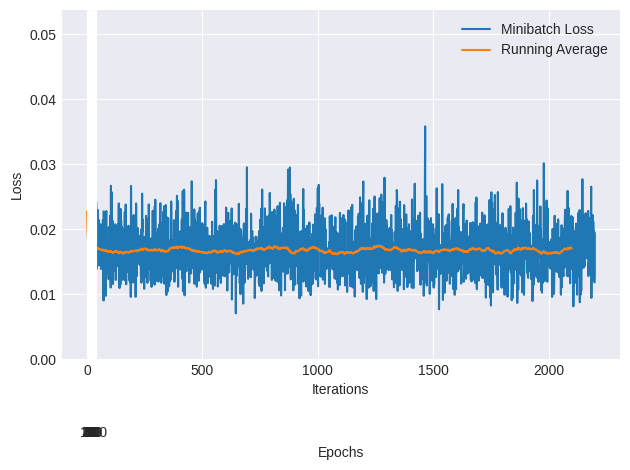

In [ ]:
plot_training_loss(minibatch_loss_list, NUM_EPOCHS, NUM_EPOCHS/BATCH_SIZE,
                       results_dir=None, averaging_iterations=100)

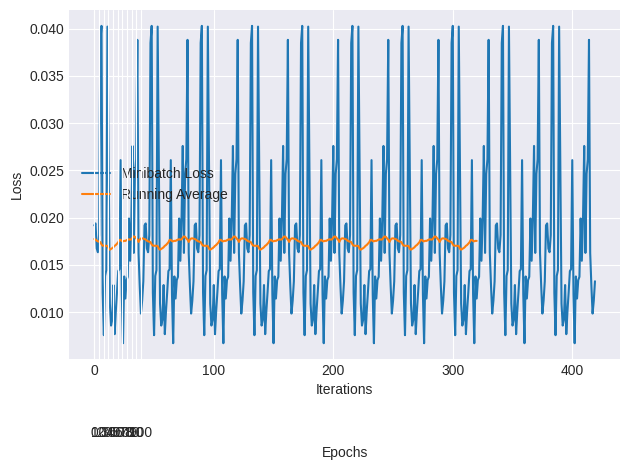

In [ ]:
plot_training_loss(minibatch_val_loss_list, NUM_EPOCHS, NUM_EPOCHS/BATCH_SIZE,
                       results_dir=None, averaging_iterations=100)

# **Visualize Prediction**

In [38]:
def test_model(model, num_epochs, test_loader,device,logging_interval=100):

    start_time = time.time()
    minibatch_val_loss_list = []
    pred_list = []
    target_list = []
    
    for epoch in range(num_epochs):
        model.eval()
        with torch.no_grad():
          for batch_idx, (targets, input, month) in enumerate(test_loader):
              #print(batch_idx)
              #input.unsqueeze_(-1)

              input = input.to(device)
              targets = targets.to(device)
              input = input.permute(0,2,1)

              pred, out, hidden, cell = model(input, month)

              loss_fn = torch.nn.SmoothL1Loss()
              #loss_fn = torch.nn.MSELoss()
              test_loss = loss_fn(pred, targets)

              pred_list.append(pred)
              target_list.append(targets)

              # ## LOGGING
              minibatch_val_loss_list.append(test_loss.item())
              if not batch_idx % logging_interval:
                  print(f'Epoch: {epoch+1:03d}/{num_epochs:03d} '
                        f'| Batch {batch_idx:04d}/{len(test_loader):04d} '
                        f'| Loss: {test_loss:.4f}')
    return minibatch_val_loss_list,pred_list,target_list

In [ ]:
minibatch_val_loss_list,pred_list,target_list = test_model(model, 1, test_dataloader, DEVICE)

Epoch: 001/001 | Batch 0000/0014 | Loss: 0.0018


In [ ]:
mm_rain.inverse_transform(pred_list[5].permute(1,0).numpy())

array([[0.00000000e+00, 4.89209938e+00, 0.00000000e+00, 7.18780899e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.00931692e+00,
        0.00000000e+00, 0.00000000e+00, 6.75996351e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 2.23767929e+01, 0.00000000e+00, 1.22057274e-02,
        0.00000000e+00, 0.00000000e+00, 2.93614715e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 2.20562458e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.56228828e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        7.52922153e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

In [ ]:
mm_rain.inverse_transform(target_list[0].permute(1,0).numpy())

array([[  2.2      ,   0.       ,   0.       ,   0.       ,   0.       ,
          0.       ,   0.4      ,   0.2      ,   0.       ,   0.       ,
          0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
          4.2000003,   0.       ,   2.       ,   0.       ,   0.       ,
          0.       ,   0.       ,   0.8      ,   0.6      ,   0.       ,
          0.       ,   0.       ,   0.4      ,   0.       ,   0.       ,
          1.2      ,   0.       ,   0.       ,   0.       ,   0.       ,
          0.       ,   0.       ,   0.       ,   0.       ,   6.4      ,
          0.       ,   0.       ,   0.6      ,   1.2      ,   0.       ,
          0.       ,  11.2      ,   2.2      ,   0.       ,   0.       ,
          0.       ,  20.2      ,   0.       ,   3.2      ,   6.2      ,
          2.       ,   0.       ,   0.       ,  11.599999 ,   0.       ,
          0.       ,   8.599999 ,   0.       ,   0.       ,   0.       ,
          0.2      ,   0.       ,   0.       ,   6.

In [ ]:
real_pred_list = np.vstack(pred_list)
real_pred_list = mm_rain.inverse_transform(real_pred_list)
real_pred_list = real_pred_list.squeeze(1)
real_pred_list

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [ ]:
real_target_list = np.vstack(target_list)
real_target_list = mm_rain.inverse_transform(real_target_list)
real_target_list = real_target_list.squeeze(1)
real_target_list

array([2.2, 0. , 0. , ..., 0.8, 0.4, 6.2], dtype=float32)

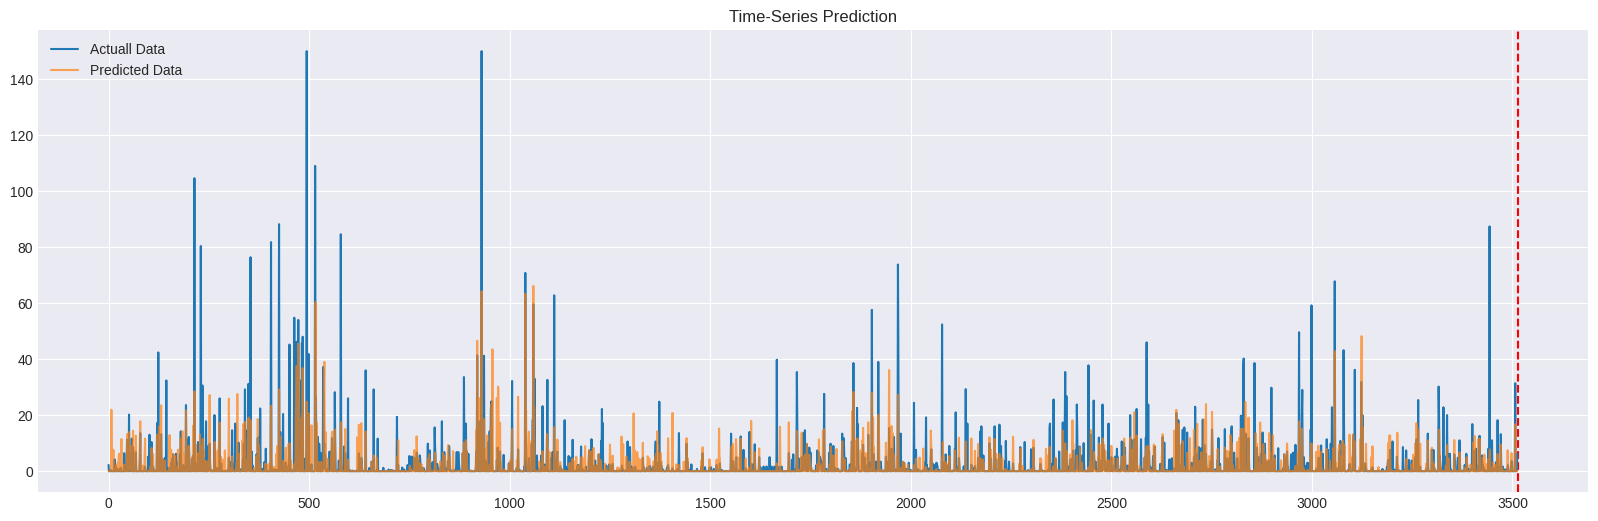

In [ ]:
plt.figure(figsize=(20,6)) #plotting
plt.axvline(x=len(real_target_list), c='r', linestyle='--') #size of the training set

plt.plot(real_target_list, label='Actuall Data') #actual plot
plt.plot(real_pred_list, label='Predicted Data',alpha=0.7) #predicted plot
plt.title('Time-Series Prediction')
plt.legend()
plt.show() 

# **Result evaluation**

In [ ]:
# model.load_state_dict(state_dict)
#evaluate time series
#plot residual
#calculate MSE
#compare vs random model
#compare with simple model

In [ ]:
#calculate MSE and RMSE
import math
from sklearn.metrics import mean_absolute_error as mae
 
MSE = np.square(np.subtract(real_target_list,real_pred_list)).mean() 
 
RMSE = math.sqrt(MSE)

MAE = mae(real_target_list,real_pred_list)
print('MSE',MSE)
print('RMSE',RMSE)
print('MAE',MAE)

MSE 45.786438
RMSE 6.766567666718574
MAE 2.2092602


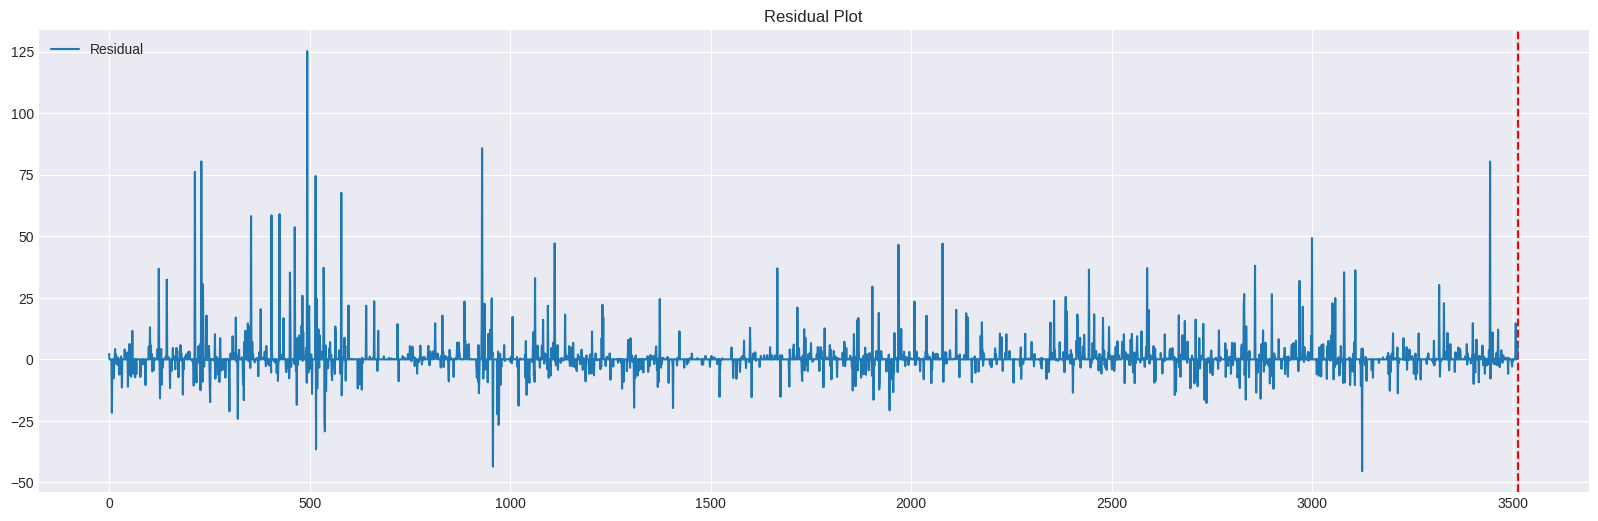

In [ ]:
#plot Residual
residual = np.subtract(real_target_list,real_pred_list)

plt.figure(figsize=(20,6)) #plotting
plt.axvline(x=len(residual), c='r', linestyle='--') #size of the training set

plt.plot(residual, label='Residual') #actual plot
plt.title('Residual Plot')
plt.legend()
plt.show() 

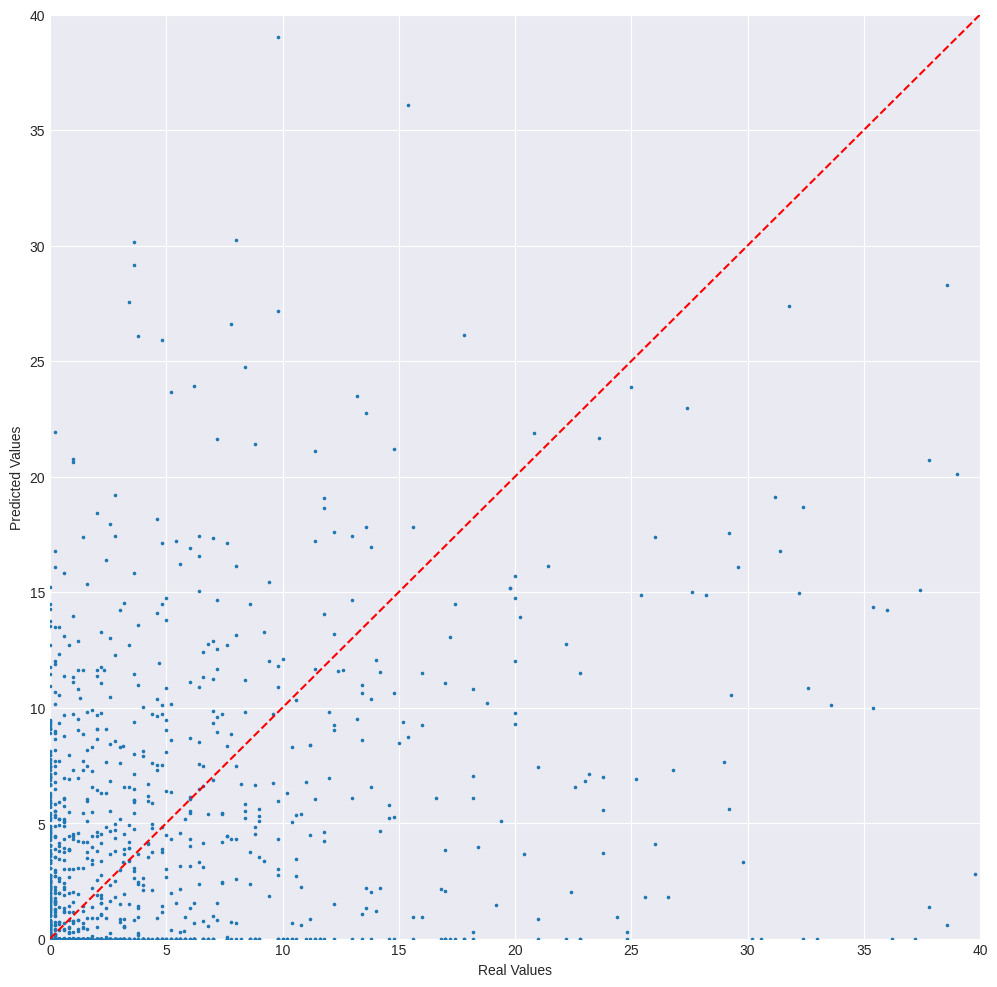

In [ ]:
plt.figure(figsize=(12,12))
plt.scatter(real_target_list, real_pred_list,s=2.5)
plt.xlim([0, 40])
plt.ylim([0, 40])
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.axline( (0,0),slope=1,linestyle='--',color='red')

# **Compare with random model**

In [ ]:
#compare with random model prediction:
random_model = Rain_LSTM(input_size = 16,
             hidden_size = 32,
             fc_hidden_size = 64,
             output_size=1)

random_val_list,random_pred_list,random_target_list = test_model(random_model, 1, test_dataloader, DEVICE)

random_pred_list = np.vstack(random_pred_list)
random_pred_list = mm_rain.inverse_transform(random_pred_list)
random_pred_list = random_pred_list.squeeze(1)

random_target_list = np.vstack(random_target_list)
random_target_list = mm_rain.inverse_transform(random_target_list)
random_target_list = random_target_list.squeeze(1)


random_MSE = np.square(np.subtract(random_target_list,random_pred_list)).mean() 
 
random_RMSE = math.sqrt(random_MSE)

random_MAE = mae(random_target_list,random_pred_list)
print('MSE',random_MSE)
print('RMSE',random_RMSE)
print('MAE',random_MAE)

Epoch: 001/001 | Batch 0000/0014 | Loss: 0.0031
MSE 137.27216
RMSE 11.71632006057016
MAE 9.8348055


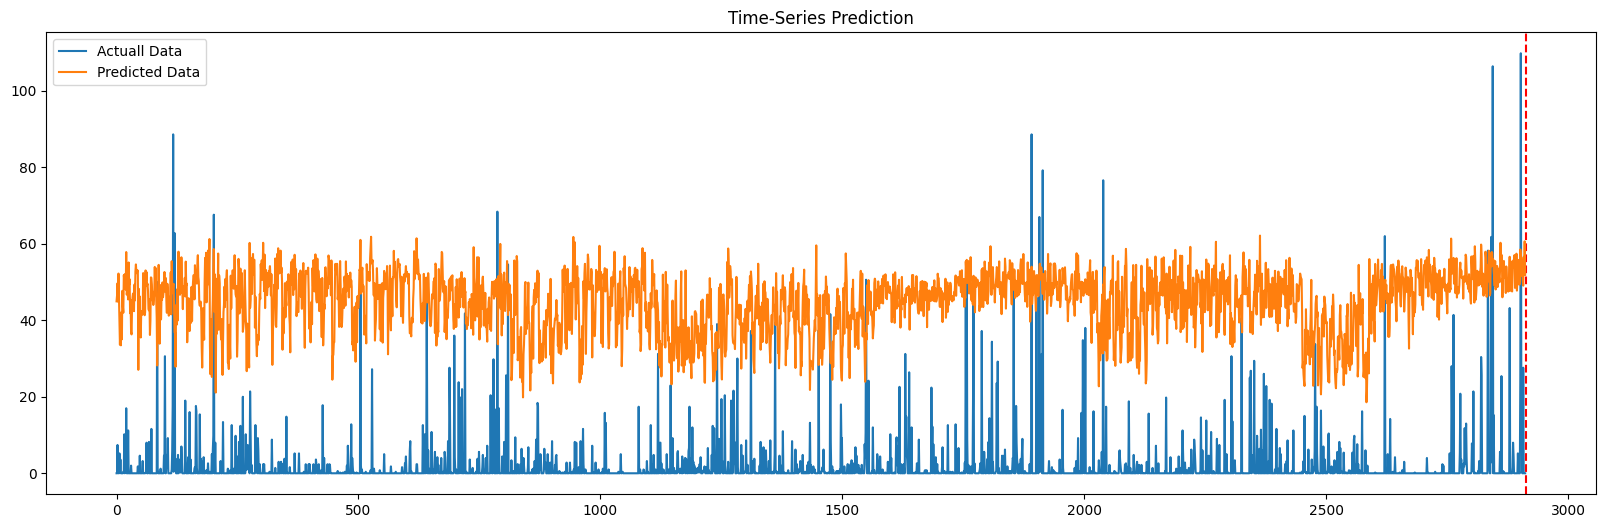

In [ ]:
plt.figure(figsize=(20,6)) #plotting
plt.axvline(x=len(real_target_list), c='r', linestyle='--') #size of the training set

plt.plot(random_target_list, label='Actuall Data') #actual plot
plt.plot(random_pred_list, label='Predicted Data') #predicted plot
plt.title('Time-Series Prediction')
plt.legend()
plt.show() 

# **Save and load model**

In [ ]:
print("Our model: \n\n", model, '\n')
print("The state dict keys: \n\n", model.state_dict().keys())

Our model: 

 Rain_LSTM(
  (relu): ReLU()
  (unit): LSTM(16, 32, batch_first=True)
  (fc): Linear(in_features=32, out_features=64, bias=True)
  (fc_final): Linear(in_features=64, out_features=1, bias=True)
  (fc_month): Linear(in_features=12, out_features=32, bias=True)
) 

The state dict keys: 

 odict_keys(['unit.weight_ih_l0', 'unit.weight_hh_l0', 'unit.bias_ih_l0', 'unit.bias_hh_l0', 'fc.weight', 'fc.bias', 'fc_final.weight', 'fc_final.bias', 'fc_month.weight', 'fc_month.bias'])


In [ ]:
torch.save(model.state_dict(), 'checkpoint.pth')

#download checkpoint file
files.download('checkpoint.pth')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [39]:
# state_dict = torch.load('checkpoint.pth')

uploaded = files.upload()

# print(state_dict.keys())

Saving 1_day_256batch_90input.pth to 1_day_256batch_90input.pth


In [40]:
model.load_state_dict(torch.load('1_day_256batch_90input.pth'))

<All keys matched successfully>

# **Perform 30 days prediction**

In [41]:
uploaded = files.upload()

Saving sydney.csv to sydney.csv


In [58]:
df_30 = pd.read_csv('sydney.csv')
df_30.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
176,26-04-23,Sydney,14.8,21.7,0.2,5.2,5.1,ENE,35,WNW,...,92,73,1029.1,1026.2,6,7,17.0,21.1,No,No
177,27-04-23,Sydney,14.9,25.2,0.0,3.2,9.7,ENE,37,N,...,74,62,1025.8,1021.3,3,1,20.1,23.9,No,No
178,28-04-23,Sydney,14.7,27.5,0.0,4.2,9.9,NNE,31,WNW,...,92,62,1018.4,1012.7,1,1,17.2,25.6,No,No
179,29-04-23,Sydney,17.2,18.6,0.0,6.6,0.0,WNW,41,WNW,...,86,93,1011.3,1009.5,8,8,18.6,18.3,No,No
180,30-04-23,Sydney,14.1,18.6,27.0,0.6,0.0,WNW,41,WNW,...,88,63,1010.4,1009.6,7,4,16.2,19.8,No,No


In [107]:
df_30_pred = df_30[-151:-30]
df_30_pred.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
30,01-12-22,Sydney,17.9,22.5,0.0,3.8,0.4,ESE,30,ESE,...,64,55,1017.0,1015.1,7,7,19.9,21.7,No,No
31,02-12-22,Sydney,16.5,25.3,0.0,10.4,7.5,ESE,33,SSE,...,60,50,1017.4,1016.6,7,6,20.0,24.7,No,No
32,03-12-22,Sydney,15.2,24.4,0.0,8.0,12.8,E,31,SSW,...,74,52,1019.3,1017.1,3,1,19.5,23.8,No,No
33,04-12-22,Sydney,15.4,26.0,0.0,6.8,12.7,ENE,43,W,...,74,45,1017.4,1014.1,5,1,19.9,24.9,No,No
34,05-12-22,Sydney,16.4,27.9,0.0,10.7,10.3,N,41,E,...,73,59,1009.0,1003.3,2,3,21.8,26.3,No,No


In [109]:
df_30_pred_scaled = df_30_pred.copy()
#min-max rainfall - humidity
df_30_pred_scaled['Rainfall'] = mm_rain.fit_transform(np.array(df_30_pred['Rainfall']).reshape(-1, 1))
df_30_pred_scaled['Humidity9am'] = np.array(df_30_pred['Humidity9am'])*0.01
df_30_pred_scaled['Humidity3pm'] = np.array(df_30_pred['Humidity3pm'])*0.01

#standard scaling temp, evaporation, sunshine, wind, pressure, cloud
df_30_pred_scaled['MinTemp'] = ss_temp.fit_transform(np.array(df_30_pred['MinTemp']).reshape(-1, 1))
df_30_pred_scaled['MaxTemp'] = ss_temp.fit_transform(np.array(df_30_pred['MaxTemp']).reshape(-1, 1))
df_30_pred_scaled['Temp9am'] = ss_temp.fit_transform(np.array(df_30_pred['Temp9am']).reshape(-1, 1))
df_30_pred_scaled['Temp3pm'] = ss_temp.fit_transform(np.array(df_30_pred['Temp3pm']).reshape(-1, 1))

#standard scaling evaporation
df_30_pred_scaled['Evaporation'] = ss_eva.fit_transform(np.array(df_30_pred['Evaporation']).reshape(-1, 1))

#standard scaling sunshine
df_30_pred_scaled['Sunshine'] = ss_sun.fit_transform(np.array(df_30_pred['Sunshine']).reshape(-1, 1))

#standard scaling wind
df_30_pred_scaled['WindGustSpeed'] = ss_max_wind.fit_transform(np.array(df_30_pred['WindGustSpeed']).reshape(-1, 1))
df_30_pred_scaled['WindSpeed9am'] = ss_wind.fit_transform(np.array(df_30_pred['WindSpeed9am']).reshape(-1, 1))
df_30_pred_scaled['WindSpeed3pm'] = ss_wind.fit_transform(np.array(df_30_pred['WindSpeed3pm']).reshape(-1, 1))

#standard scaling pressure
df_30_pred_scaled['Pressure9am'] = ss_pressure.fit_transform(np.array(df_30_pred['Pressure9am']).reshape(-1, 1))
df_30_pred_scaled['Pressure3pm'] = ss_pressure.fit_transform(np.array(df_30_pred['Pressure3pm']).reshape(-1, 1))

#standard scaling could
df_30_pred_scaled['Cloud9am'] = ss_cloud.fit_transform(np.array(df_30_pred['Cloud9am']).reshape(-1, 1))
df_30_pred_scaled['Cloud3pm'] = ss_cloud.fit_transform(np.array(df_30_pred['Cloud3pm']).reshape(-1, 1))

df_30_pred_scaled = df_30_pred_scaled.drop([i for i in categorical],axis = 1) #only consider numerical for now
df_30_pred_scaled = df_30_pred_scaled.drop('Location',axis = 1)
df_30_pred_scaled = df_30_pred_scaled.drop('Date',axis = 1)
df_30_pred_scaled = df_30_pred_scaled.drop('RainToday', axis = 1)
df_30_pred_scaled = df_30_pred_scaled.drop('RainTomorrow', axis = 1)
df_30_pred_scaled.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
30,-0.270885,-1.396864,0.0,-1.178315,-1.677056,-1.081766,0.184946,-0.288586,0.64,0.55,0.476972,0.441864,0.852259,1.155661,-0.520262,-1.183891
31,-0.873881,-0.461757,0.0,1.205176,-0.014130,-0.813358,0.751490,-0.445878,0.60,0.50,0.546549,0.684889,0.852259,0.773598,-0.474940,-0.216851
32,-1.433805,-0.762327,0.0,0.338452,1.227209,-0.992296,-0.664869,0.025999,0.74,0.52,0.877037,0.765898,-0.615689,-1.136716,-0.701548,-0.506963
33,-1.347663,-0.227981,0.0,-0.094910,1.203787,0.081336,-1.656321,0.655168,0.74,0.45,0.546549,0.279847,0.118285,-1.136716,-0.520262,-0.152382
34,-0.916952,0.406556,0.0,1.313517,0.641671,-0.097603,0.184946,-0.288586,0.73,0.59,-0.914556,-1.469934,-0.982676,-0.372590,0.340848,0.298903


In [110]:
apr_2023_test_input = create_window(df_30_pred_scaled,input_size = N_INPUT_DAYS, output_size = 1)
apr_2023_test_input = torch.from_numpy(apr_2023_test_input).float()
apr_2023_test_input = apr_2023_test_input.permute(0,2,1)
apr_2023_test_input.shape

torch.Size([31, 91, 16])

In [111]:
apr_2023_test_real = np.array(df_30['Rainfall'][-61:-30])
apr_2023_test_real

array([ 0. ,  0. ,  2.2, 20. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0.6,  9.8,  0. ,  0. ,  0. ,  0. ,  0. ,  0.6,  0.2,
        1.2,  4.6,  0. ,  1.8,  8.2,  0.6,  4.2,  0. ,  0. ])

In [112]:
apr_2023_test_month = torch.tensor([2]*31).float()
apr_2023_test_month.shape

torch.Size([31])

In [113]:
#perform iterative prediction
apr_2023_pred_list = []
with torch.no_grad():
  first_pred, out, hidden, cell = model(apr_2023_test_input, apr_2023_test_month)


first_pred = np.vstack(first_pred)
first_pred = mm_rain.inverse_transform(first_pred)
first_pred = first_pred.squeeze(1)
first_pred

array([2.5288906 , 0.        , 4.0520616 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.3536441 , 0.8684312 , 6.2221346 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 4.446484  ,
       0.6373141 , 1.6118635 , 1.8386816 , 0.        , 0.3336753 ,
       0.20354174, 2.336925  , 1.758832  , 2.7846193 , 0.        ,
       0.        ], dtype=float32)

In [114]:
#first_pred = first_pred[-59:-30]
first_pred

array([2.5288906 , 0.        , 4.0520616 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.3536441 , 0.8684312 , 6.2221346 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 4.446484  ,
       0.6373141 , 1.6118635 , 1.8386816 , 0.        , 0.3336753 ,
       0.20354174, 2.336925  , 1.758832  , 2.7846193 , 0.        ,
       0.        ], dtype=float32)

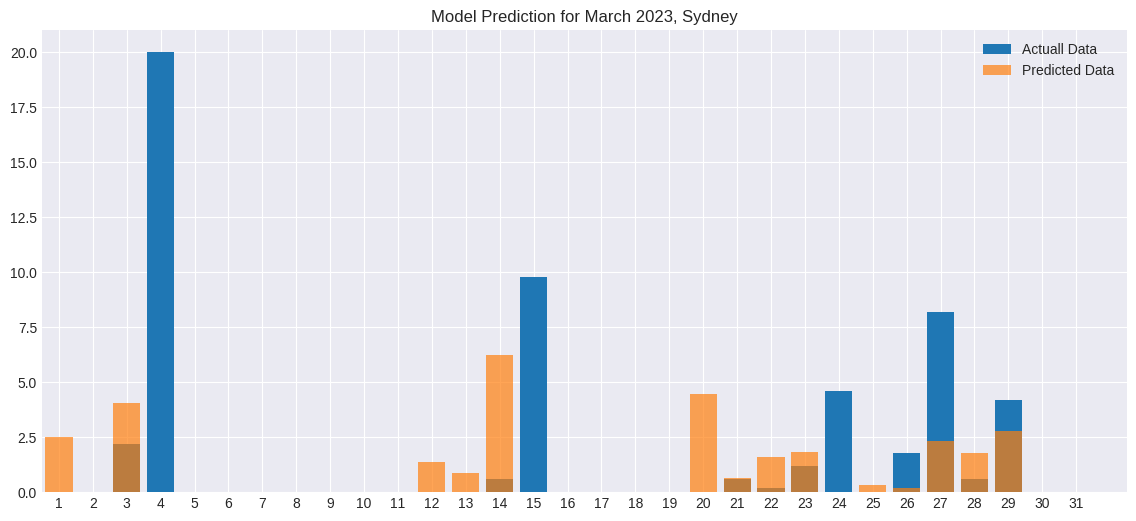

In [115]:
plt.figure(figsize=(14,6)) #plotting
plt.bar(range(1,len(first_pred)+1),apr_2023_test_real, label='Actuall Data') #actual plot
plt.bar(range(1,len(first_pred)+1),first_pred, label='Predicted Data',alpha=0.7) #predicted plot
plt.xlim([0.5,len(first_pred)+1.5])
plt.xticks([i for i in range(1,len(first_pred)+1)])
plt.title('Model Prediction for March 2023, Sydney')
plt.legend()
plt.show() 

In [ ]:
import math
from sklearn.metrics import mean_absolute_error as mae
 
apr_MSE = np.square(np.subtract(apr_2023_test_real,first_pred)).mean() 
 
apr_RMSE = math.sqrt(apr_MSE)

apr_MAE = mae(real_target_list,real_pred_list)
print('MSE',apr_MSE)
print('RMSE',apr_RMSE)
print('MAE',apr_MAE)

MSE 21.05107451171761
RMSE 4.588144996806183
MAE 2.2092602
